In [1]:
# Data Manupulation
import numpy as np
import pandas as pd
# Plotting graphs
import matplotlib.pyplot as plt

# CSV File - Read
df = pd.read_csv('C:\\Users\\radha\\Desktop\\dsp27 Class\\cerealspga05.csv')
#  ,header=None ,skiprows=1 , names=['Cal', 'Pr', 'Fat', 'sod', 'Fib', 'Rting']
print(df.head(2)) 

        name mfr type  calories  protein  fat  sodium  fiber  carbo  sugars  \
0  100%_Bran   N    C        70        4    1     130   10.0    5.0       6   
1   All-Bran   K    C        70        4    1     260    9.0    7.0       5   

   potass  vitamins  shelf  weight  cups     rating  
0     280        25      3     1.0  0.33  68.402973  
1     320        25      3     1.0  0.33  59.425505  


In [2]:
newdf = df.loc[:,['mfr','calories','protein','fat','sodium','fiber','carbo','sugars','potass','vitamins','rating']]
print(newdf.head())


  mfr  calories  protein  fat  sodium  fiber  carbo  sugars  potass  vitamins  \
0   N        70        4    1     130   10.0    5.0       6     280        25   
1   K        70        4    1     260    9.0    7.0       5     320        25   
2   K        50        4    0     140   14.0    8.0       0     330        25   
3   K       110        3    3     140    4.0   10.0       7     160        25   
4   P       120        3    1     200    6.0   11.0      14     260        25   

      rating  
0  68.402973  
1  59.425505  
2  93.704912  
3  40.448772  
4  37.840594  


In [3]:
# Required Python Packages
import pandas as pd
import numpy as np
from sklearn import tree

In [4]:
#rating_classifier = tree.DecisionTreeClassifier()

# pruning 
rating_classifier = tree.DecisionTreeClassifier(max_depth= 4, min_samples_split=2, criterion="entropy")
# https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py

# ValueError: Unknown label type: 'continuous'
rating_classifier.fit(newdf[["calories", "rating"]], newdf["mfr"])


DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [5]:
#newdf.columns[1:10]
newdf2 = ['calories','rating']


In [6]:
from six import StringIO
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

from sklearn import tree

with open("rating_classifier.txt", "w") as f:
    f = tree.export_graphviz(rating_classifier, out_file=f)

#dot_data = StringIO()
#export_graphviz(rating_classifier, out_file=dot_data,   filled=True, rounded=True,
#                special_characters=True,feature_names=newdf2, impurity=True, class_names = newdf.mfr)
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#Image(graph.create_png())

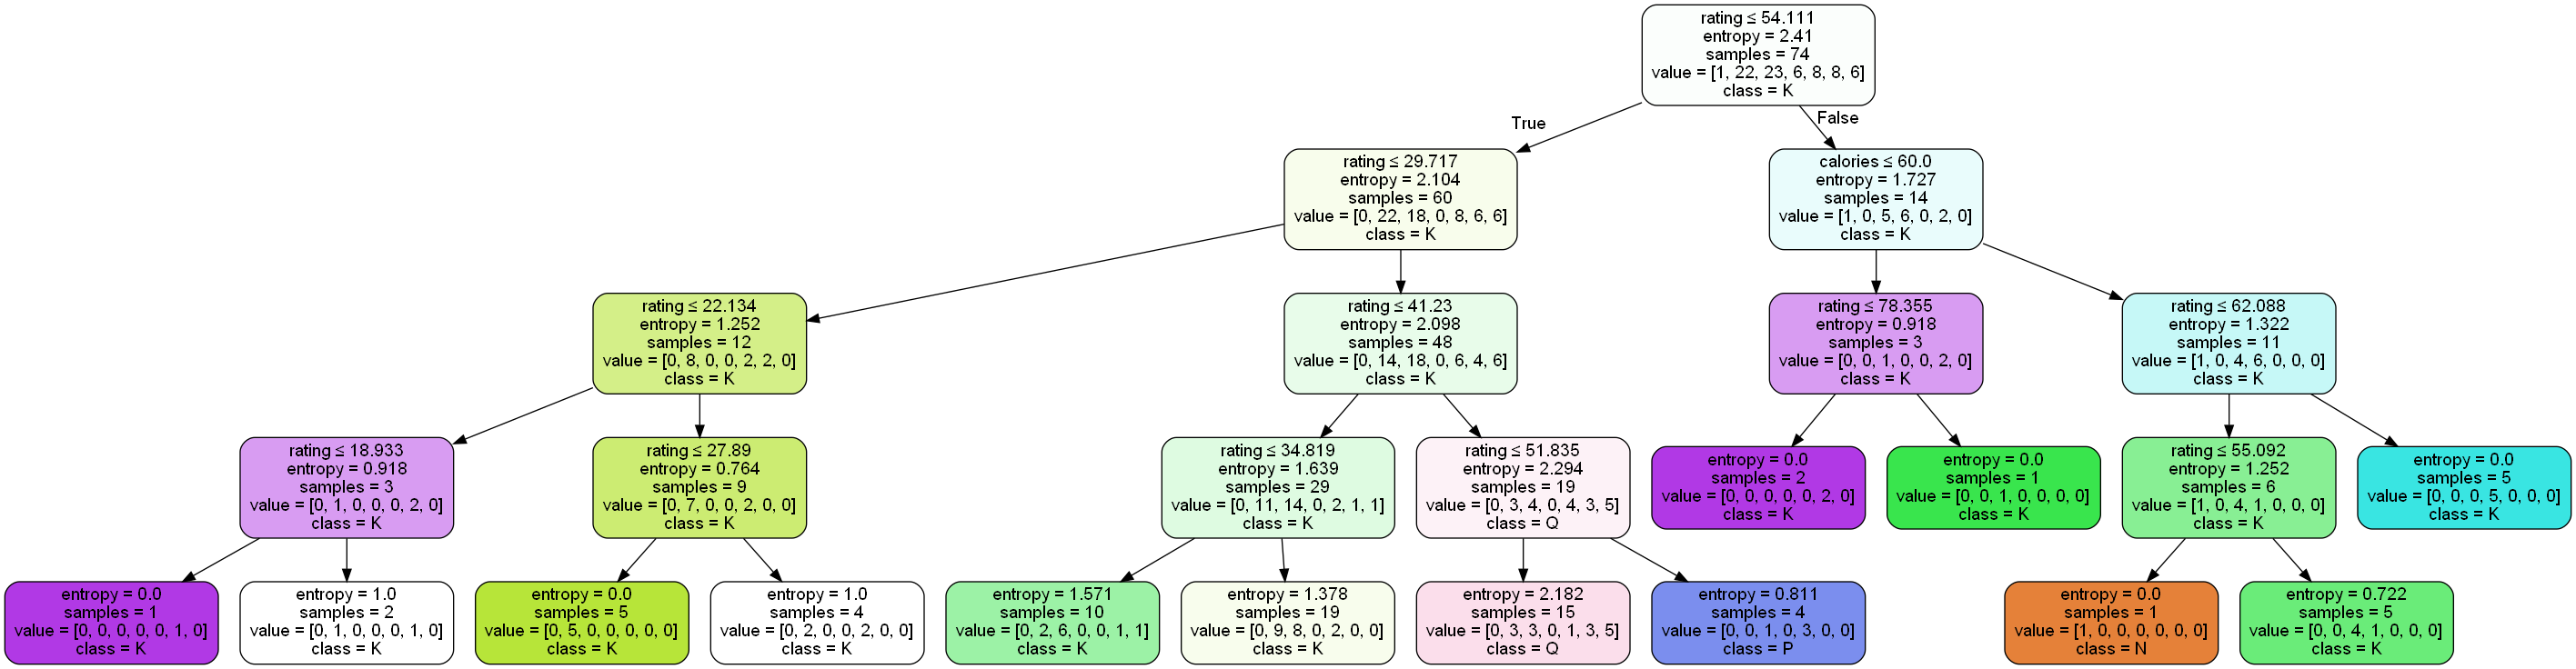

In [7]:
dot_data = StringIO()
export_graphviz(rating_classifier, out_file=dot_data,   filled=True, rounded=True,
                special_characters=True,feature_names=newdf2, impurity=True, class_names = newdf.mfr)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


In [8]:
def get_code(tree, feature_names):
        left      = tree.tree_.children_left
        right     = tree.tree_.children_right
        threshold = tree.tree_.threshold
        features  = [feature_names[i] for i in tree.tree_.feature]
        value = tree.tree_.value

        def recurse(left, right, threshold, features, node):
                if (threshold[node] != -2):
                        print ("if ( " + features[node] + " <= " + str(threshold[node]) + " ) {")
                        if left[node] != -1:
                                recurse (left, right, threshold, features,left[node])
                        print ("} else {")
                        if right[node] != -1:
                                recurse (left, right, threshold, features,right[node])
                        print( "}")
                else:
                        print ("return " + str(value[node]))

        recurse(left, right, threshold, features, 0)

In [9]:
#get_lineage(fruit_classifier, fruit_data_set.columns)
# get_code(rating_classifier, newdf.columns)

In [10]:
#We can prune our decision tree by using information gain in both post-pruning and pre-pruning. 
#In pre-pruning, we check whether information gain at a particular node is greater than minimum gain. 
#In post-pruning, we prune the subtrees with the least information gain until we reach a desired number of leaves.

In [11]:
#A tree that has too many branches and layers can result in overfitting of the training data
# Pruning a decision tree means to remove a subtree that is redundant and not a useful split and replace it with a leaf node

In [12]:
# PRE PRUNING:
# MAX - depth   -> Early Stopping Rule, ->  Gini Impurity or the Information Gain.
#
# Post-pruning means to prune after the tree is built. You grow the tree entirely using your decision tree algorithm

In [15]:
# Reduced Error Pruning (REP)
#Cost-complexity pruning works by calculating a Tree Score based on Residual Sum of Squares (RSS) for the subtree, 
#and a Tree Complexity Penalty that is a function of the number of leaves in the subtree.


#Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

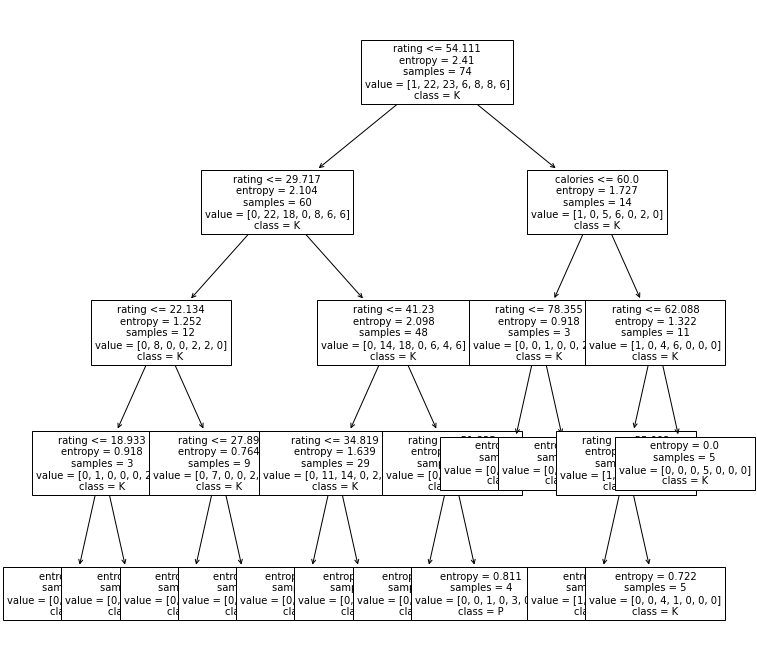

In [18]:

from matplotlib.pyplot import figure
figure(figsize=(12, 12))
# font size
tree.plot_tree(rating_classifier, fontsize=10, feature_names=newdf2,class_names = newdf.mfr,max_depth=4)
plt.show()

In [19]:
# theory
# https://www.datacamp.com/community/tutorials/decision-tree-classification-python

In [20]:
from sklearn.tree import DecisionTreeClassifier
rating_classifier = tree.DecisionTreeClassifier(max_depth= 4, min_samples_split=2, criterion="entropy")
rating_classifier.fit(newdf[["calories", "rating"]], newdf["mfr"])
y_pred = rating_classifier.predict(newdf[["calories", "rating"]])

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(newdf["mfr"], y_pred))
#print(classification_report(newdf[["calories", "rating"]], y_pred))

[[ 1  0  0  0  0  0  0]
 [ 0 17  2  0  0  0  3]
 [ 0  8 11  0  1  0  3]
 [ 0  0  1  5  0  0  0]
 [ 0  4  0  0  3  0  1]
 [ 0  1  1  0  0  3  3]
 [ 0  0  1  0  0  0  5]]


In [26]:
rating_classifier.classes_

array(['A', 'G', 'K', 'N', 'P', 'Q', 'R'], dtype=object)

In [29]:
labels = ['A', 'G', 'K', 'N', 'P', 'Q', 'R']
print(confusion_matrix(newdf["mfr"], y_pred))


[[ 1  0  0  0  0  0  0]
 [ 0 17  2  0  0  0  3]
 [ 0  8 11  0  1  0  3]
 [ 0  0  1  5  0  0  0]
 [ 0  4  0  0  3  0  1]
 [ 0  1  1  0  0  3  3]
 [ 0  0  1  0  0  0  5]]


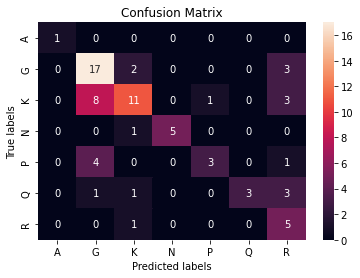

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt     
labels = ['A', 'G', 'K', 'N', 'P', 'Q', 'R']
cm = confusion_matrix(newdf["mfr"], y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax); 

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['A', 'G', 'K', 'N', 'P', 'Q', 'R']); ax.yaxis.set_ticklabels(['A', 'G', 'K', 'N', 'P', 'Q', 'R']);

In [25]:
print(classification_report(newdf["mfr"], y_pred))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00         1
           G       0.57      0.77      0.65        22
           K       0.69      0.48      0.56        23
           N       1.00      0.83      0.91         6
           P       0.75      0.38      0.50         8
           Q       1.00      0.38      0.55         8
           R       0.33      0.83      0.48         6

    accuracy                           0.61        74
   macro avg       0.76      0.67      0.66        74
weighted avg       0.69      0.61      0.61        74

